In [5]:
from tensorflow import keras

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os
import image_utils as ps
from loss import bce_dice_loss

## Load test image

In [6]:
image_dir = '/content/Clip_final_hlaing_thar_yar11.jpg'
image = np.array(Image.open(image_dir))

## Resize image if necessary

original height= 2631, original width = 3735
new height = 1315, new width = 1867


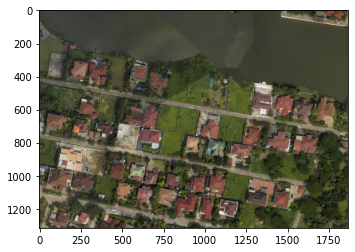

In [7]:
resize = True

scale = 0.5

if resize:
    image = ps.resize_image(image, percent = scale)
    
plt.imshow(image)

## Pad and crop image

In [8]:
model_input_w = 512
model_input_h = 512

# pad & crop
padded_image = ps.pad(image, model_input_w, model_input_h)
cropped_tiles = ps.crop(padded_image, model_input_w, model_input_h, numpy_output=True)

image width =  1867 , image height =  1315
pad width =  181 , pad height =  221


## Load model

In [18]:
model = keras.models.load_model('/content/Dice_EPOCH150_Unet.h5',custom_objects={ 'bce_dice_loss': bce_dice_loss}) #Load BCE loss from loss.py into model

## Inference

In [19]:
model_predictions = model.predict(cropped_tiles,verbose=1)

preds = np.squeeze(model_predictions)

threshold = 0.95
preds = preds > threshold

1/1 [==============================] - 8s 8s/step


## Reconstruct final predicted image

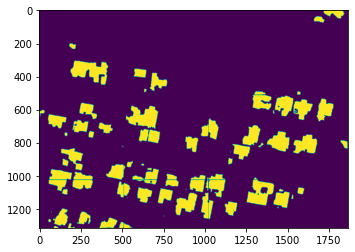

In [20]:
img_h, img_w = image.shape[:2]

predicted_image = ps.reconstruct(preds, img_w, img_h, model_input_w, model_input_h, numpy_output = False)

plt.imshow(predicted_image)

## Save image

In [ ]:
# folder for saving output files by model
output_folder = 'outputs/inference outputs'

predicted_image_save_dir = f'{output_folder}/png/predicted_image.png'

# save predicted image in outpus folder
predicted_image.save(predicted_image_save_dir)